# Network Science: Representation

This notebook covers graph theory fundamentals, necessary to represent networks. We define a graph as a set $\mathcal{G} (\mathcal{V}, \mathcal{E})$ comprising:

- A set of vertices $\mathcal{V}$; and 
- A set of edges $\mathcal{E}$

The set $\mathcal{E}$ comprises unordered pairs of vertices $(u, v) \in \mathcal{E}$, where $u, v \in \mathcal{V}$.

We shall use the Python package `networkx` which abstracts most of the common operations on graphs.

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Consider a simple graph comprising six nodes indexed by $\mathcal{V} = \{ 1,\dots,6 \}$, and the edges $\mathcal{E} = \{ (1,2), (1,5), (2,3), (3,4), (3,5), (3,6), (4,5), (4,6) \} $. The graph can be created using `networkx` as follows.

In [2]:
G = nx.Graph()
edges = [(1,2), (1,5), (2,3), (3,4), (3,5), (3,6), (4,5), (4,6)]
G.add_edges_from(edges)
print(G)

Graph with 6 nodes and 8 edges


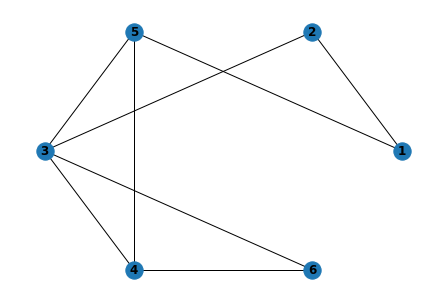

In [3]:
nx.draw(G, with_labels=True, font_weight='bold', pos=nx.circular_layout(G))

We define $N_v := |\mathcal{V}|$ as __graph order__ and $N_e := |\mathcal{V}|$ as the graph size. These attributes can be queried from the graph in networkx as:

In [4]:
print(f'Graph order = {G.number_of_nodes()}')
print(f'Graph size = {G.number_of_edges()}')

Graph order = 6
Graph size = 8


## Identifying networks

Networks arise in many domains and applications. Below is a list of well-known network examples, clearly highlighting what might constitute vertices and edges:

| Network | Vertices | Eddges |
|---------|----------|--------|
| Internet| Router | Internet link|
| World-wide web (www) | Web pages | Web links |
| Friendship network | Individual | Friendship |
| Citation network | Article | Citation |
| Co-authorship network | Author | Article co-authorship |
| Power grid | Substation | Power transmission line |
| Gene regulatory network | Gene | Regulation of expression |
| Disease spread network | Individual | Physical proximity between people |

It is worth pointing out that a single system can admit multiple network representations, indexed by varying associations of what constitutes vertices and edges.

## Graphical representation variants

Graphs are the mathematical abstraction of networks. The previous examples are all representable as __undirected graphs__. An undirected graph is one in which edges are _unordered_, namely, the edges $(u, v)$ and $(v, u)$ are identical, and simply represent a network connection between vertices $u$ and $v$.
Building on the simple undirected graph, this section highlights some graph variants that find particular applications in network analysis.

### Directed graphs

In many scenarios, the ordering of the vertices in an edge matters. For example, on the web, a link might exist from one page to another, but not the other way round. The edge structure is __directional__, and we need to represent such a network with an abstraction that captures the link asymmetry. __Directed graphs__ facilitate this representation. For a directed graph, it generally does not hold that $(u, v)$ is equivalent to $(u, v)$. The edge $(u, v)$ indicates a directional link/connection from the origin vertex $u$ to the destination vertex $v$.

Directed edges are often called __arcs__, and directed graphs can also be called __digraphs__. When visualizing digraphs, the common convention is to draw the arc $(u, v)$ as an arrow starting at the origin node $u$ and point at the destination node $v$.

Using `networkx` one can represent directed graphs using the class `networkx.DiGraph()`. See the example below:


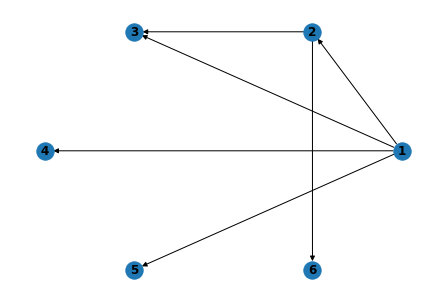

In [5]:
G = nx.DiGraph()
edges = [(1,2), (2,3), (1, 3), (1,4), (1,5), (2, 6)]
for edge in edges:
    G.add_edge(edge[0], edge[1])

nx.draw(G, with_labels=True, font_weight='bold', pos=nx.circular_layout(G))

For further details on representation of digraphs in `networkx` see the documentation [here](https://networkx.org/documentation/stable/reference/classes/digraph.html).

### Multigraphs

It is possible to have a graph with _loopy_ edges, for example, an edge $(u, u)$ from vertex $u$ to itself. It is also possible to have _multiple_ edges separating two vertices. This is typical in the rare scenarios where edges are annotated with multiple labels. For example, in a social network, an edge between two vertices may capture co-membership to the same club, but another edge between the two vertices captures a familial relationship.

Graphs that include at least one loop or one instance of multiple edges are known as __multigraphs__. The code example below depicts creation of a digraph with self-loops at vertices $5$ and $6$.



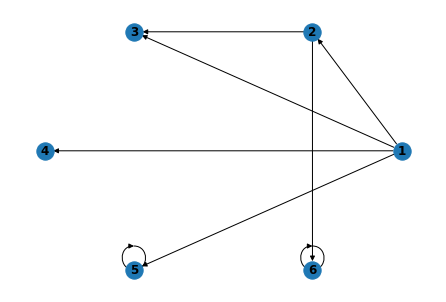

In [6]:
G = nx.DiGraph()
edges = [(1,2), (2,3), (1, 3), (1,4), (1,5), (2, 6), (5,5), (6,6)]
for edge in edges:
    G.add_edge(edge[0], edge[1])

nx.draw(G, with_labels=True, font_weight='bold', pos=nx.circular_layout(G))

The next code example creates an instance of an undirected multigraph.

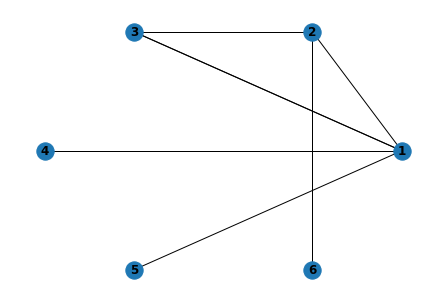

In [7]:
G = nx.MultiGraph()
G.add_edges_from([(1, 2), (2, 3), (2, 3), (1, 3), (1, 3), (1, 4), (1, 5), (2, 6)])
nx.draw(G, with_labels=True, font_weight='bold', pos=nx.circular_layout(G))

### Weighted graphs

It is common to associate edges (directed or undirected) with numerical attributes called _edge weights_. In such cases, the graph comprises a three-way tuple $\mathcal{G} = (\mathcal{V}, \mathcal{E}, \mathcal{W})$, where $\mathcal{W} := \{ w_{ij} \in \mathbb{R} \; | \; \forall \; (i, j) \in \mathcal{E} \}$ collects weights associated with each edge.

An example of a weighted graph representation of a co-authorship network would be the following:

- Vertices represent individual authors;
- Edge $(i, j)$ exists if and only if authors $i$ and $j$ have co-authored at least one paper; and
- Each edge $(i, j)$ has a weight $w_{ij}$ that counts the number of papers $i$ and $j$ have co-authored.

Similar examples can be drawn in e.g., road networks, where the weight captures traffic levels, in airport networks, where the weight captures frequency of flights, and also in electrical circuits, in which the weight might encode the conductance of the physical link between two circuit components.

## Graph properties

This section enumerates technical terms used to describe vertex-level, edge-level, and graph-level attributes. Wherever possible, the mathematical definition is provided.

### Vertex and edge adjacency

Two vertices, $i$ and $j$ are __adjacent__ if there exists an edge $(i, j)$ between them. Similarly, two edges are adjacent if they share a common vertex.

### Vertex degree

The degree of a vertex counts the number of incident edges to that vertex. Consider the code example below that depicts the famous _Karate club network_.

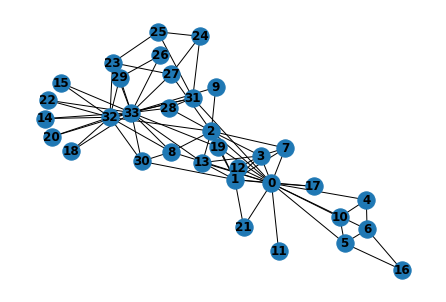

In [14]:
G = nx.karate_club_graph()
nx.draw(G, with_labels=True, font_weight='bold', pos=nx.spring_layout(G))

In [16]:
print(f'The degree of vertex 0 is {G.degree()[1]}')
print(f'The degree of vertex 11 is {G.degree()[11]}')
print(f'The degree of vertex 15 is {G.degree()[15]}')

The degree of vertex 0 is 9
The degree of vertex 11 is 1
The degree of vertex 15 is 2


There are a few noteworthy properties regarding vertex degree. Suppose $d_v$ denotes the degree of vertex $v$:

- In simple graphs (free of loops or multiedges) $d_v \in \{ 0, \dots, N_v - 1\}$ where $N_v := |\mathcal{V}|$ is the graph order.
- The sum of the degree sequence is twice the size of the graph, that is, $\sum\limits_{v=1}^{N_v} d_v = 2 |\mathcal{E}| = 2 N_e$.
- The number of vertices with odd degree is even.

The proofs of the above properties are omitted here for brevity.

In digraphs, the notion of degree is a bit more complicated due to the directionality of the edges. Specifically, each vertex has an _in-degree_ and _out-degree_. The in-degree counts the number of incoming edges, while the out-degree counts the number of outgoing edges.

### Traversing a graph

Graph traversals find many practical applications in e.g., routing problems in network communications, and optimal route identification in navigation systems, to mention a few. A graph traversal entails movement from one vertex to another, following edges. This section highlights common terminologies used to describe traversals in both directed and undirected graphs.

- A _walk_ of length $w$ from $v_0$ to $v_w$ is a sequence $\{ v_0, e_1, v_1, \dots, v_{w-1}, e_{w}, v_w \}$, where $e_i$ is the edge incident to $v_{i-1}$ and $v_i$.
- A _trail_ is a walk with no repeated edges.
- A _path_ is a walk with no repeated vertices. Note that a path is also a trail.
- A _circuit_ is a _closed trail_. A closed trail or path is one in which $v_0 = v_w$, that is the start and end vertex are the same.
-  A _cycle_ is a closed walk with no repeated vertices, except the start and end ($v_0 = v_w$).

### Graph connectivity

In analysis of complex networks, _connectivity_ is an important attribute that encodes the ease of flow of information within the network. In order to define connectivity, let us first define the related concept of _reachability_. Vertex $v$ is reachable from vertex $u$ if there exists a $u - v$ walk.

A graph is said to be __connected__ if every vertex in the graph is reachable from every other vertex. In a connected graph, there is a non-zero probability that any random walk with a given origin vertex will lead to any arbitrary vertex.

### Subgraphs and connected components

